# K-Means
## Assignment-6
#### Rohith Ramakrishnan - CB.EN.U4AIE19052
#### Python For Machine Learning
<hr style="border:1px solid gray"> </hr>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
import pylab as pl
import time as t

## Generating 2 sets of Random Data:

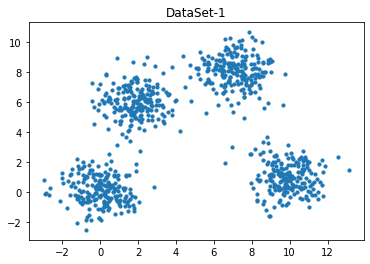

In [3]:
#Random Data -1
cen_1 = np.array([0,0])
cen_2 = np.array([7,8])
cen_3 = np.array([10,1])
cen_4 = np.array([2,6])
#The final Convergence of the KMeans Algorithms should have Centroids close to these values.

# Generate random data and center it to the three centers
data_1 = np.random.randn(200,2) + cen_1
data_2 = np.random.randn(200,2) + cen_2
data_3 = np.random.randn(200,2) + cen_3
data_4 = np.random.randn(200,2) + cen_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=10)
plt.title("DataSet-1")
plt.show()

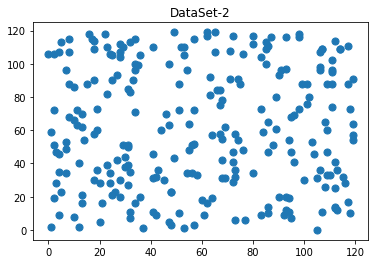

In [4]:
#Random Data -2
X = np.array(np.random.randint(120,size=(250,2)))
plt.scatter(X[:,0], X[:,1], s=50)
plt.title("DataSet-2")
plt.show() 

<hr style="border:1px solid gray"> </hr>

## Defining a Class for the K-Means Algorithm :
### The Algorithm :
#### 1. Initialse a Function to Compute Euclidean Distance.
#### 2. The Main Algorithm : <br>
    i.   Random k Points from the given DataSet is chosen where k is the inputed number of centeroids 
    
    ii.  k x m matrix where m is the length of the data set is created
    
    iii. Each row in this matrix will correspond to a centroid

    iv.  Each column will correspond to the distance of a point from the centroids

    v.   Using argmin we find which centroid each column is closest to

    vi. Mean of those clustered points is computed to find the new centeroid

    vii. This Process is repeated for a user specified number of iterations and will be broken if the centeroids   remain the same in every iterations

In [4]:
class kmeans:
    
    def __init__(self, X, k , maxit):
        self.k = k
        self.X = X
        self.maxit = maxit
    
    def distance(self,x, y):
        s=0
        for i in range(0,len(x)):
            s += (x[i] - y[i])**2
        return math.sqrt(s)
    
    def classify(self):
        start_time = t.time()
        k=self.k
        X=self.X
        plt.figure(figsize=[13,10])
        
        #Using the random to select random points in the Data array 
        cent=random.sample(list(X),k)
        ic = np.array(cent)
        
        #Printing the randomly chosen points:
        print("Centers Initial:")
        for a in cent:
            print(a)
        print("")
       
        loss=0
        for s in range(self.maxit):
            c = cent.copy()
            D = np.zeros((k,len(X)))
            
            for i in range(0,k):
                for a in range(0,len(X)):
                    D[i][a] = self.distance(cent[i],X[a])
            L = np.argmin(D,axis=0)
            
            for v in range(0,k):
                i = [index for index, element in enumerate(L) if element == v]
                #returns the index of the element==v ; enumerate gives the index and element while iterating
                cent[v]=X[i].mean(axis=0)   
            c=np.array(c)
            cent=np.array(cent)
            
            #We dont have to run the whole iterations instaed when the center values remains same
            #We can break the loop since its gonna be constant
            if(np.linalg.norm(c-cent)<0.0001):
                print("Iterations Taken to Converge :",s,'\n')
                break
                
        S=[[] for a in range(k)]
        for v in range(len(L)):
            S[L[v]].append(X[v].tolist())
            for i in range(k):
                for r in S[L[v]]:
                    loss+=self.distance(cent[i],r)**2
             #The loss value is the sum of the square distance of all the points from its centroids.        
        print("Final Centers:")
        for a in cent:
            print(a)
        print("")
        print("Run Time : %s seconds" % (t.time() - start_time))
        S = np.array(S)
        
        #Plotting all the clustered points with the final and initial centers
        for i in range(0,k):
            o=np.array(S[i])
            l="Classification-"+str(i+1)
            plt.scatter(o[:,0], o[:,1], s=50,label=l)
        c = np.array(cent)
        plt.scatter(c[:,0], c[:,1],marker="^", s=250,label="Centeroids")
        plt.scatter(ic[:,0], ic[:,1],marker="*",color='black',s=250,label="Randomly Chosen Initial Centeroids")
        plt.legend()
        plt.show()      

<hr style="border:1px solid gray"> </hr>

## Testing the Kmeans Algorithm:
We call the kmeas class using the following arguments :
1. The Data Set
2. Number of Clusters / Centeroids
3. Maximum Iterations

#### DataSet -1 :

Centers Initial:
[7.55357299 9.99503024]
[1.03787207 7.81054556]
[2.74578472 1.05693503]
[1.98776682 0.37203762]

Iterations Taken to Converge : 2 

Final Centers:
[7.10152387 7.97113176]
[1.86537795 5.89426436]
[10.02001195  0.90907403]
[ 0.06664897 -0.20830915]

Run Time : 0.8232691287994385 seconds


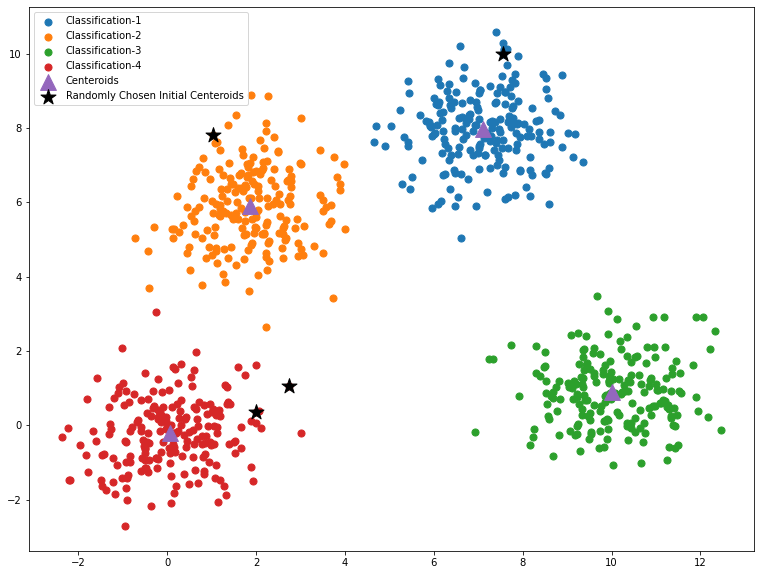

In [5]:
a = kmeans(data,4,300).classify()

This Random data set was created from a given set of centers and the final centers are extremly close to the previously defined ones. 

#### DataSet -2 :

Centers Initial:
[117  31]
[22 91]
[ 3 82]

Iterations Taken to Converge : 13 

Final Centers:
[93.42105263 55.09473684]
[44.2375 98.025 ]
[35.86666667 33.16      ]

Run Time : 0.13113808631896973 seconds


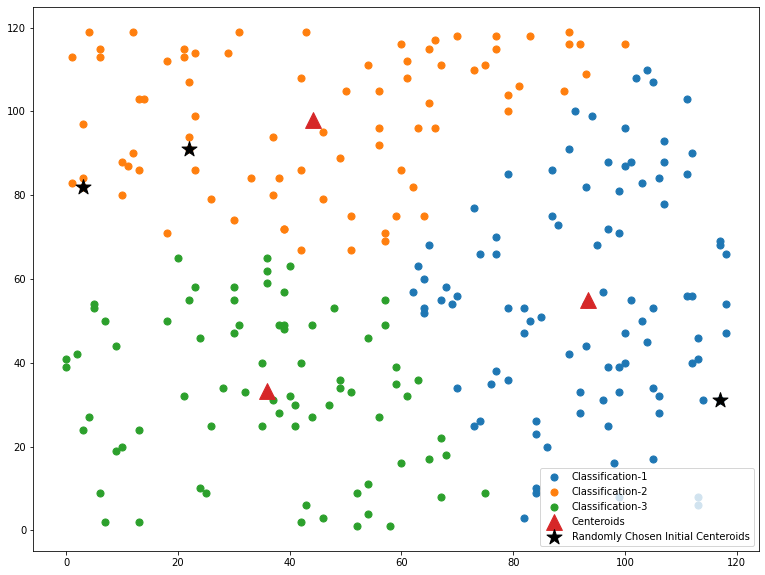

In [6]:
b = kmeans(X,3,300).classify()

<hr style="border:1px solid gray"> </hr>

### Animating the above-mentioned Algorithm :

In [7]:
class kmeans_animate:
    
    
    def __init__(self, X, k , maxit):
        self.k = k
        self.X = X
        self.maxit = maxit
        
 

    def animate(self):
        
        def distance(x, y):
            s=0
            for i in range(0,len(x)):
                s += (x[i] - y[i])**2
            return math.sqrt(s)
        k=self.k
        X=self.X
        maxit=self.maxit
        #Using the random to select random points in the Data array 
        cent=random.sample(list(X),k)
        #Printing the randomly chosen points:
        print("Centers Initial:")
        for a in cent:
            print(a)
        print("")
        s=0
        loss=0
        lp=[]
        for s in range(maxit):
            c1 = cent.copy()
            ll=0
            s+=1
            D = np.zeros((k,len(X)))
            for i in range(0,k):
                for a in range(0,len(X)):
                    D[i][a] = distance(cent[i],X[a])
            L = np.argmin(D,axis=0)

            for v in range(0,k):
                i = [index for index, element in enumerate(L) if element == v]
                cent[v]=X[i].mean(axis=0) 

            S=[[] for a in range(k)]
            for v in range(len(L)):
                S[L[v]].append(X[v].tolist())
                for i in range(k):
                    for r in S[L[v]]:
                        loss+=distance(cent[i],r)**2
                        ll+=distance(cent[i],r)
            lp.append(ll)
            S = np.array(S)
            for i in range(0,k):
                o=np.array(S[i])
                l="Classification-"+str(i+1)
                plt.scatter(o[:,0], o[:,1], s=25,label=l)
            c = np.array(cent) 
            plt.scatter(c[:,0], c[:,1],marker="^", s=100,label="Centeroids")
            plt.legend()
            display.clear_output(wait=True)
            plt.show()
            display.display(pl.gcf())#hold the plots on same figure
            c1=np.array(c1)
            if(np.linalg.norm(c1-cent)<0.0001):
                        print("Iterations Taken to Converge :",s,'\n')
                        break

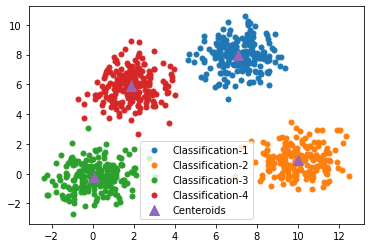

<Figure size 432x288 with 0 Axes>

Iterations Taken to Converge : 10 



<Figure size 432x288 with 0 Axes>

In [8]:
a = kmeans_animate(data, 4, 300).animate()